# CSV/Excel 데이터 분석 Agent

Pandas DataFrame 을 활용하여 분석을 수행하는 Agent 를 생성할 수 있습니다.

CSV/Excel 데이터로부터 Pandas DataFrame 객체를 생성할 수 있으며, 이를 활용하여 Agent 가 Pandas query 를 생성하여 분석을 수행할 수 있습니다.

In [1]:
# API 키를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API 키 정보 로드
load_dotenv()

True

In [2]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("CH15-Agent-CSV-Excel")

LangSmith 추적을 시작합니다.
[프로젝트명]
CH15-Agent-CSV-Excel


In [3]:
import pandas as pd

df = pd.read_csv("./data/titanic.csv")  # CSV 파일을 읽습니다.
# df2 = pd.read_excel("./data/titanic.xlsx", sheet_name="Sheet1") # 엑셀 파일도 읽을 수 있습니다.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
from langchain_experimental.tools import PythonAstREPLTool

# 파이썬 코드를 실행하는 도구를 생성합니다.
python_tool = PythonAstREPLTool()
python_tool.locals["df"] = df


# 도구 호출 시 실행되는 콜백 함수입니다.
def tool_callback(tool) -> None:
    print(f"<<<<<<< Code >>>>>>")
    if tool_name := tool.get("tool"):  # 도구에 입력된 값이 있다면
        if tool_name == "python_repl_ast":
            tool_input = tool.get("tool_input")
            for k, v in tool_input.items():
                if k == "query":
                    print(v)  # Query 를 출력합니다.
                    result = python_tool.invoke({"query": v})
                    print(result)
    print(f"<<<<<<< Code >>>>>>")


# 관찰 결과를 출력하는 콜백 함수입니다.
def observation_callback(observation) -> None:
    print(f"<<<<<<< Message >>>>>>")
    if "observation" in observation:
        print(observation["observation"])
    print(f"<<<<<<< Message >>>>>>")


# 최종 결과를 출력하는 콜백 함수입니다.
def result_callback(result: str) -> None:
    print(f"<<<<<<< 최종 답변 >>>>>>")
    print(result)
    print(f"<<<<<<< 최종 답변 >>>>>>")

In [5]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.agents.agent_types import AgentType
from langchain_openai import ChatOpenAI
from langchain_teddynote.messages import AgentStreamParser, AgentCallbacks

agent = create_pandas_dataframe_agent(
    ChatOpenAI(model="gpt-4o", temperature=0),
    df,
    verbose=True,
    agent_type="tool-calling",
    allow_dangerous_code=True,
    prefix="You are a professional data analyst and expert in Pandas. "
    "You must use Pandas DataFrame(`df`) to answer user's request. "
    "\n\n[IMPORTANT] DO NOT create or overwrite the `df` variable in your code. \n\n"
    "If you are willing to generate visualization code, please use `plt.show()` at the end of your code. "
    "I prefer seaborn code for visualization, but you can use matplotlib as well."
    "\n\n<Visualization Preference>\n"
    "- `muted` cmap, white background, and no grid for your visualization."
    "\nRecomment to set palette parameter for seaborn plot.",
)

parser_callback = AgentCallbacks(tool_callback, observation_callback, result_callback)
stream_parser = AgentStreamParser(parser_callback)

In [6]:
def ask(query):
    # 질의에 대한 답변을 출력합니다.
    response = agent.stream({"input": query})

    for step in response:
        stream_parser.process_agent_steps(step)



> Entering new None chain...
<<<<<<< Code >>>>>>
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='muted', annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={'shrink': .5}, palette='muted')

plt.title('Correlation Heatmap')
plt.show()
ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'
<<<<<<< Code >>>>>>

Invoking: `python_repl_ast` with `{'query': "import seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Calculate the correlation matrix\ncorr = df.corr()\n\n# Set up the matplotlib figure\nplt.figure(figsize=(10, 8))\n\n# Draw the heatmap with the mask and correct aspect ratio\nsns.heatmap(corr, cmap='muted', annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={'shrink': .5}, palette='muted')\n\nplt.title('Correlation Heatmap')\nplt.show()"}`




<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<<<<<<< Code >>>>>>
# Using a valid colormap for the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.title('Correlation Heatmap')
plt.show()


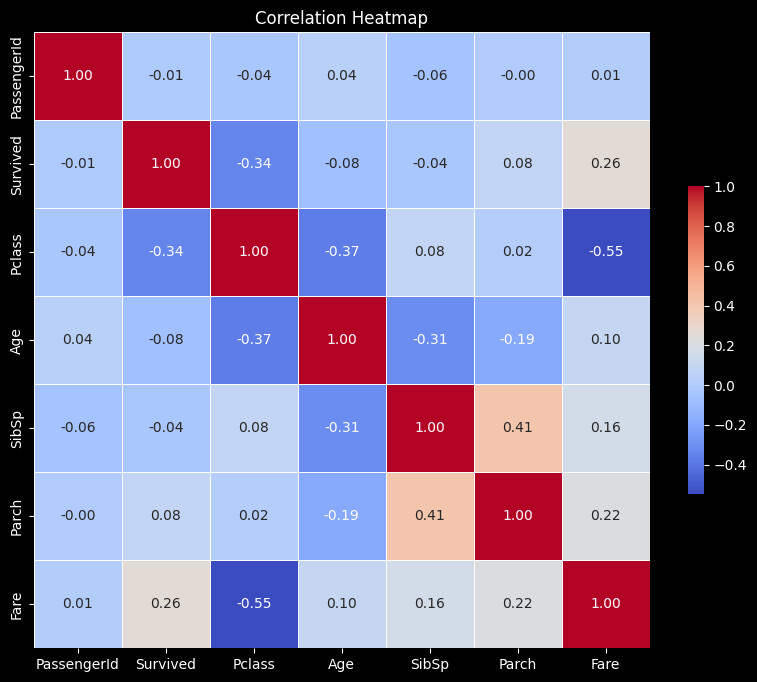


<<<<<<< Code >>>>>>

Invoking: `python_repl_ast` with `{'query': "# Using a valid colormap for the heatmap\nplt.figure(figsize=(10, 8))\nsns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={'shrink': .5})\nplt.title('Correlation Heatmap')\nplt.show()"}`




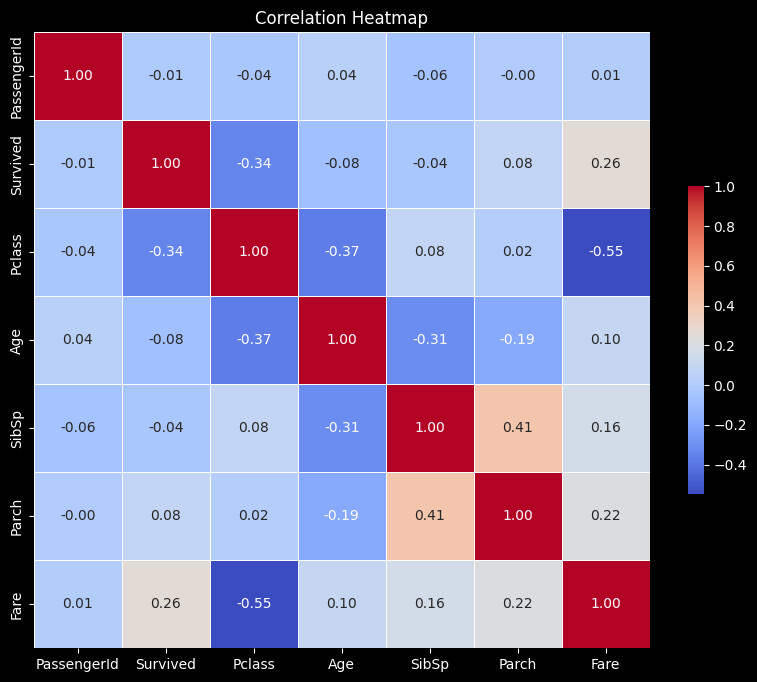

<<<<<<< Message >>>>>>

<<<<<<< Message >>>>>>
I have calculated the correlation matrix and visualized it using a heatmap. The heatmap displays the correlation coefficients between the numeric features in the dataset.

> Finished chain.
<<<<<<< 최종 답변 >>>>>>
I have calculated the correlation matrix and visualized it using a heatmap. The heatmap displays the correlation coefficients between the numeric features in the dataset.
<<<<<<< 최종 답변 >>>>>>


In [7]:
# 질의에 대한 답변을 출력합니다.
response = agent.stream({"input": "corr() 을 구해서 히트맵 시각화"})

for step in response:
    stream_parser.process_agent_steps(step)

In [ ]:
ask("몇 개의 행이 있어?")

In [ ]:
ask("남자와 여자의 생존율의 차이는 몇이야?")

In [ ]:
ask("남자 승객과 여자 승객의 생존율을 구한뒤 barplot 차트로 시각화 해줘")

In [ ]:
ask("1,2 등급에 탑승한 10세 이하 어린 아이의 성별별 생존율을 구하고 시각화 하세요")